In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
from scipy.optimize import newton
sp.init_printing()
import pandas as pd
import urllib.request

# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Orly De Jesus Rivera Cruz
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

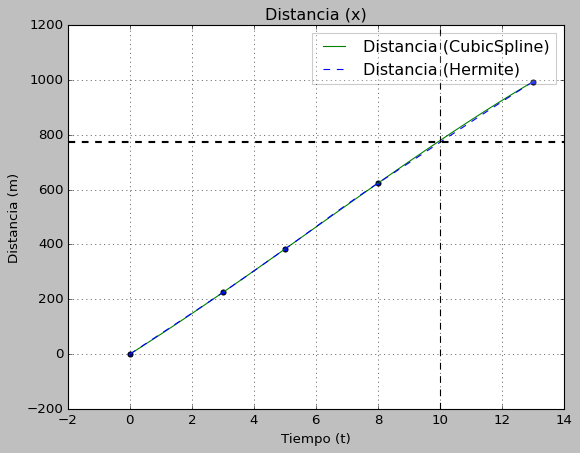



Podemos darnos cuenta que con cubicsplines la distancia en t=10 da ---> 778.4190647482014 metros
Con el metodo de Hermite la distancia en t=10 da ---> 771.96 metros

Nuestros resultados son bastante parecidos con los dos metodos numericos




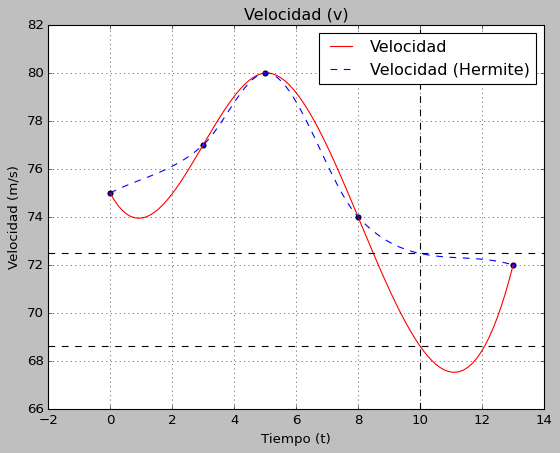



Podemos darnos cuenta que con cubicsplines la velocidad en t=10 da ---> 68.61510791366906 metros/segundo
Con el metodo de Hermite la velocidad en t=10 da ---> 72.48 metros/segundo

Nuestros resultados se alejan un poco pero esto es debido a la forma en la cual calculamos aceleraciones para hermite


La maxima velocidad calculada con el metodo de CubicSpline es de: 79.99880391414267 
Mientras que por el metodo de hermite obtenemos que: 79.99883049795304
Aunque igual por los metodos se acercan a un valor en comun que a juzgar por el grafico y nuestros puntos dados es de 80m/s


In [2]:
#1
T = np.linspace(0,13,100)

tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
aceleraciones = np.gradient(velocidades , tiempos) #Calculado para obtener un polinomio de la velocidad con hermite

#-------------------------------------

Polinomio_distancia_Hermite = CubicHermiteSpline(tiempos , distancias , velocidades)
Polinomio_velocidad_Hermite = CubicHermiteSpline(tiempos , velocidades , aceleraciones)

Polinomio_distancia = CubicSpline(tiempos , distancias)
Polinomio_velocidad = CubicSpline(tiempos , velocidades)

#-------------------------------------
#Grafico de la distancia
plt.style.use("classic")

plt.scatter(tiempos , distancias)

plt.plot( T , Polinomio_distancia(T) , label="Distancia (CubicSpline)" , c="g")
plt.plot( T , Polinomio_distancia_Hermite(T) , label="Distancia (Hermite)" , c="b" , ls="--")

plt.title("Distancia (x)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Distancia (m)")

plt.axvline(10 , ls="--" , c="black")
plt.axhline(Polinomio_distancia(10) , ls="--" , c="black")
plt.axhline(Polinomio_distancia_Hermite(10) , ls="--" , c="black")

plt.legend( framealpha = 0.2)
plt.grid()
plt.show()


#------------------------------------

print( "\n\nPodemos darnos cuenta que con cubicsplines la distancia en t=10 da --->" , Polinomio_distancia(10),"metros" )
print( "Con el metodo de Hermite la distancia en t=10 da --->" , Polinomio_distancia_Hermite(10),"metros\n" )
print("Nuestros resultados son bastante parecidos con los dos metodos numericos\n\n")

#------------------------------------
#Grafico de la velocidad
plt.scatter(tiempos , velocidades)

plt.plot( T , Polinomio_velocidad(T) , label="Velocidad" ,c="r")
plt.plot( T , Polinomio_velocidad_Hermite(T) , label="Velocidad (Hermite)" , c="b" , ls="--")

plt.title("Velocidad (v)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad (m/s)")


plt.axvline(10 , ls="--" , c="black")
plt.axhline(Polinomio_velocidad(10) , ls="--" , c="black")
plt.axhline(Polinomio_velocidad_Hermite(10) , ls="--" , c="black")

plt.legend()
plt.grid()
plt.show()

#------------------------------------

print( "\n\nPodemos darnos cuenta que con cubicsplines la velocidad en t=10 da --->" , Polinomio_velocidad(10),"metros/segundo" )
print( "Con el metodo de Hermite la velocidad en t=10 da --->",Polinomio_velocidad_Hermite(10),"metros/segundo\n" )
print("Nuestros resultados se alejan un poco pero esto es debido a la forma en la cual calculamos aceleraciones para hermite\n\n")

#------------------------------------
#Calculamos el valor maximo con nuestro intervalo de puntos con los dos metodos
MaxVelCub = max(Polinomio_velocidad(T)) 
MaxVelHer = max(Polinomio_velocidad_Hermite(T))

print("La maxima velocidad calculada con el metodo de CubicSpline es de:",MaxVelCub ,"\nMientras que por el metodo de hermite obtenemos que:", MaxVelHer)
print("Aunque igual por los metodos se acercan a un valor en comun que a juzgar por el grafico y nuestros puntos dados es de 80m/s")

# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

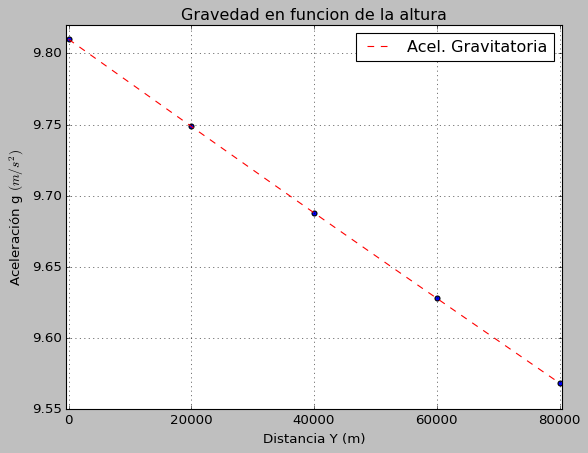

 La aceleracion gravitatoria en diferentes alturas:
 g( 5000m ) =  [9.7946541] m/s^2
 g( 42000m ) =  [9.68185867] m/s^2
 g( 90000m ) =  [9.53841562] m/s^2


In [3]:
#2

y_conti = np.linspace(0,80000 , 1000)

y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

def Newton( x, y , xc): #Metodo de diferencias divididas de newton
    DifDiv = y.copy()
    Coeficientes = [ y[0] ]
    for i in range( 1 , len(x) ):
        for n in range( 0 , len(x) - i):
            DifDiv[n] = ( DifDiv[n+1] - DifDiv[n] ) / ( x[n+i] - x[n] )
        DifDiv = DifDiv[ 0 : len(DifDiv) - 1]
        Coeficientes.append( DifDiv[0] )
    
    Pol = np.zeros_like(xc)
    for j in range( len(Coeficientes) - 1 , 0 , -1 ):
        Pol += Coeficientes[j]
        Pol *= (xc - x[j-1])
    Pol += Coeficientes[0]
    return Pol

Pol = Newton(y , g , y_conti) #Puntos de el intervalo ya evaluados por el polinomio

#Grafico de como varia nuestra gravedad
plt.scatter( y , g , c="blue")
plt.plot( y_conti , Pol , color="red" , ls="--" , label="Acel. Gravitatoria")

plt.title("Gravedad en funcion de la altura")
plt.xlabel("Distancia Y (m)")
plt.ylabel("Aceleración g $(m/s^2)$")

plt.xlim(-400 , 80400)
plt.ylim(9.55 , 9.82)
plt.legend()
plt.grid()
plt.show()

#-------------------------------
#Valores puntuales
print(" La aceleracion gravitatoria en diferentes alturas:")
print(" g( 5000m ) = ",Newton( y , g , np.array([5000.0]) ), "m/s^2")
print(" g( 42000m ) = ",Newton( y , g , np.array([42000.0]) ), "m/s^2")
print(" g( 90000m ) = ",Newton( y , g , np.array([90000.0]) ), "m/s^2")    # EXTRAPOLACIÓN, FUERA DE NUESTRO INTERVALO DE PUNTOS

#-------------------------------

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



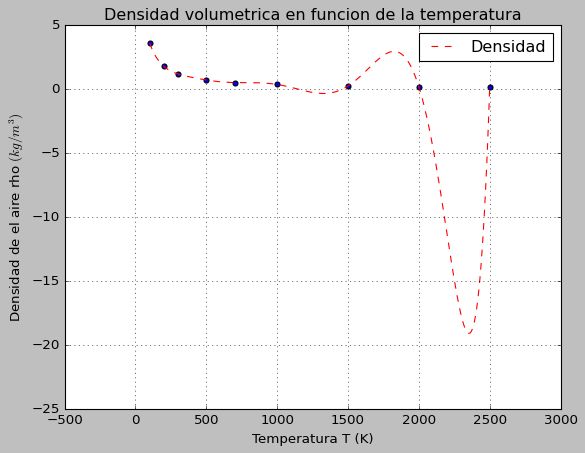

Con el metodo de Newton podemos darnos cuenta que fluctua en nuestro extremo derecho, esto debido a que son demasiados puntos
Lo que hace que se genere un polinomio de alto grado produciendo errores de redondeos.
 La densidad de el aire en diferentes temperaturas:
 g( 250K ) =  [1.39753292] K
 g( 800K ) =  [0.49640899] K
 g( 3000K ) =  [1561.16586679] K


In [4]:
#3

T_conti = np.arange( 100.0 , 2510.0 , 10)

T   = np.array( [100   , 200   , 300   , 500   , 700   , 1000  , 1500  , 2000  , 2500  ] ) # en K
rho = np.array( [3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394] ) # en kg/m^3

Pol = Newton( T , rho , T_conti) #Usando el metodo que definimos en el punto anterios
plt.scatter( T , rho , c="blue")
plt.plot( T_conti , Pol , color="red" , ls="--" , label="Densidad")

plt.title("Densidad volumetrica en funcion de la temperatura")
plt.xlabel("Temperatura T (K)")
plt.ylabel("Densidad de el aire rho $(kg / m^3)$")

#plt.xlim(100 , 2500)
#plt.ylim(0 , 3.5)
plt.legend()
plt.grid()
plt.show()

#-------------------------------

print("Con el metodo de Newton podemos darnos cuenta que fluctua en nuestro extremo derecho, esto debido a que son demasiados puntos\n" \
"Lo que hace que se genere un polinomio de alto grado produciendo errores de redondeos.")

#-------------------------------
#Polinomio evaluado en puntos puntuales
print(" La densidad de el aire en diferentes temperaturas:")
print(" g( 250K ) = ",Newton( T , rho , np.array([250.0]) ), "K" )
print(" g( 800K ) = ",Newton( T , rho , np.array([800.0]) ), "K")
print(" g( 3000K ) = ",Newton( T , rho , np.array([3000.0]) ), "K")    # EXTRAPOLACIÓN, FUERA DE NEUSTRO INTERVALO DE PUNTOS

#-------------------------------

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

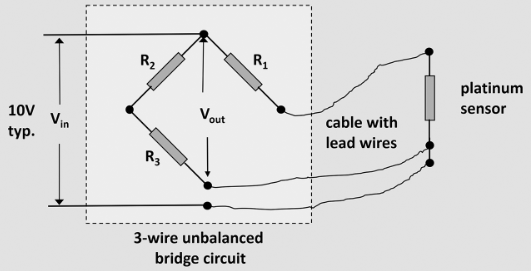




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida

In [7]:
#4

resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

SalidaDeVoltaje = CubicSpline(resistencia , voltaje ,bc_type="natural")
print("La salida de voltaje cuando la resistencia es de 139.27 Ohm es de:",SalidaDeVoltaje(139.27),"V")

Resistencia0 = newton( SalidaDeVoltaje , 125) #Esto es la raiz que tiene la funcion
print("La resistencia medida que da salida de voltaje igual a cero es cuando vale:",Resistencia0,"Ohm")

La salida de voltaje cuando la resistencia es de 139.27 Ohm es de: -0.3699510277321739 V
La resistencia medida que da salida de voltaje igual a cero es cuando vale: 119.96794057155408 Ohm


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [6]:
#5

lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

LongitudOnda = CubicSpline(indice_refraccion , lambda_angstrom) #Interpolamos la funcion y evaluamos
print("Nuestra longitud de onda cuando el indice de refraccion es 1.520 iguala a :",LongitudOnda(1.520),"Å")

Nuestra longitud de onda cuando el indice de refraccion es 1.520 iguala a : 4482.265120487942 Å
